In [6]:
# import requests

# def get_lyrics(artist, title):
#     url = f"https://api.lyrics.ovh/v1/{artist}/{title}"
#     res = requests.get(url)
#     if res.status_code == 200:
#         return res.json().get("lyrics")
#     else:
#         return None

# lyrics = get_lyrics("Billie Eilish", "CHIHIRO")
# print(lyrics)

To take my love away
When I come back around, will I know what to say?
Said you won't forget my name
Not today, not tomorrow
Kind of strange, feelin' sorrow
I got change (Yup), you could borrow (Borrow)

When I come back around, will I know what to say?

Not today, maybe tomorrow



Open up the door, can you open up the door?

I know you said before you can't cope with any more

You told me it was war, said you'd show me what's in store

I hope it's not for sure, can you open up the door?



Did you take

My love away

From me? Me

Me



Saw your seat at the counter when I looked away

Saw you turned around, but it wasn't your face

Said, "I need to be alone now, I'm takin' a break"

How come whеn I returned, you werе gone away?



I don't, I don't know why I called

I don't know you at all

I don't know you

Not at all

I don't, I don't know why I called

I don't know you at all

I don't know you



Did you take

My love away

From me? Me



And that's when you found me



I was waiti

In [8]:
import requests

songs = {
    "Benee": ["Winter", "C U", "Same Effect"],
    "Billie Eilish": ["Chihiro", "Birds of a Feather", "Blue"],
    "Mae Muller": ["So annoying", "Anticlimax", "HFBD"],
    "Anne-Marie": ["FRIENDS", "2002", "I Don't Like Your Boyfriend"]
}

def get_lyrics(artist, title):
    url = f"https://api.lyrics.ovh/v1/{artist}/{title}"
    res = requests.get(url)
    if res.status_code == 200:
        return res.json().get("lyrics")
    else:
        print(f" 가사 못 가져옴: {artist} - {title}")
        return None

all_lyrics = []

for artist, titles in songs.items():
    for title in titles:
        lyrics = get_lyrics(artist, title)
        if lyrics:
            all_lyrics.append(lyrics)

print(f"\n 수집된 곡 수: {len(all_lyrics)}개")



 수집된 곡 수: 12개


In [9]:
import re

def preprocess_lyrics(lyrics_list):
    all_sentences = []

    for lyrics in lyrics_list:
        lines = lyrics.split('\n')  # 줄 단위로 자르기
        for line in lines:
            if line.strip():  # 공백 제거
                tokens = re.findall(r'\b\w+\b', line.lower())  # 단어만 추출 (소문자화)
                all_sentences.append(tokens)

    return all_sentences

processed_sentences = preprocess_lyrics(all_lyrics)

print(f"총 문장 수: {len(processed_sentences)}")
print("예시:", processed_sentences[:3])

총 문장 수: 570
예시: [['zombies', 'tryna', 'sleep'], ['zombies', 'around', 'surround', 'me'], ['i', 'm', 'out', 'of', 'place', 'i', 'feel', 'so', 'weak']]


In [10]:
from gensim.models import Word2Vec

model = Word2Vec(
    sentences=processed_sentences,
    vector_size=100,
    window=5,
    min_count=1,
    sg=1  # skip-gram
)

model.save("w2v_lyrics.model")

In [11]:
print("🔎 'love'와 비슷한 단어:")
print(model.wv.most_similar("love", topn=10))

🔎 'love'와 비슷한 단어:
[('you', 0.9951229095458984), ('i', 0.9949608445167542), ('the', 0.9948355555534363), ('in', 0.9946885704994202), ('t', 0.9946566224098206), ('a', 0.99454665184021), ('oooh', 0.9944790005683899), ('we', 0.9940457344055176), ('and', 0.993994951248169), ('it', 0.9939284324645996)]


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127925 (\N{MUSICAL NOTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/

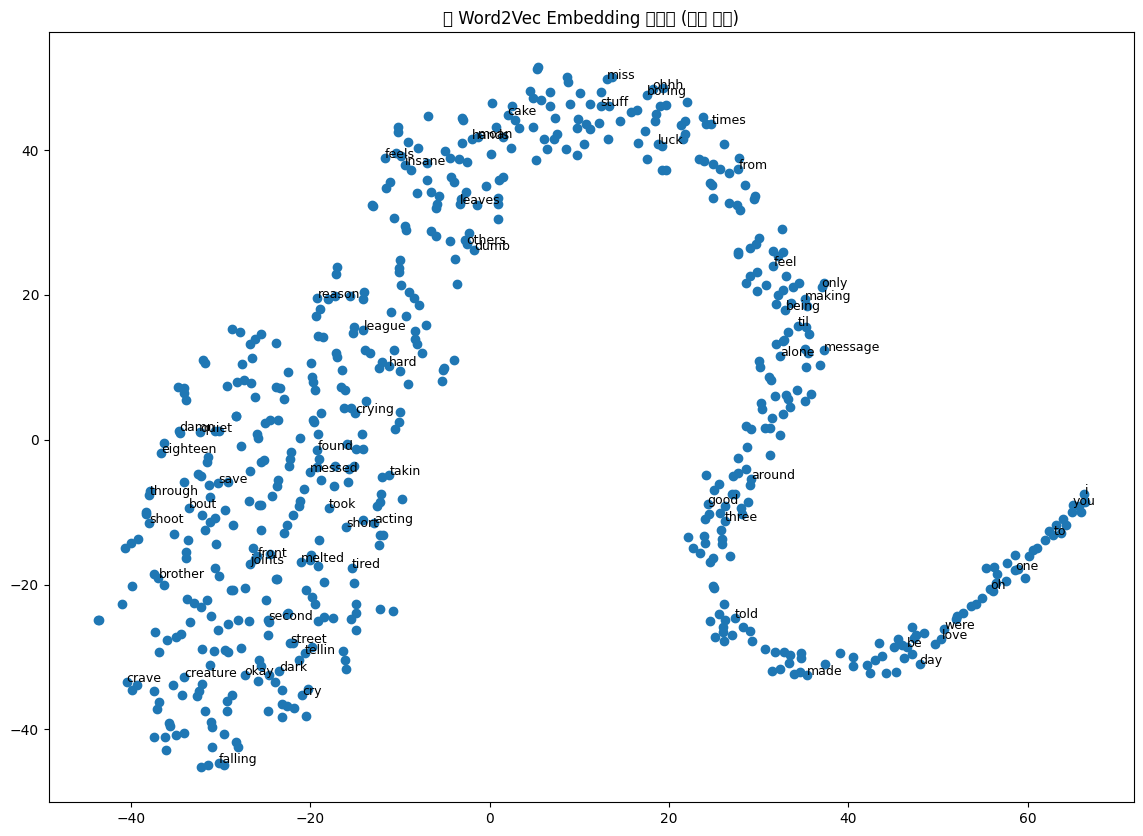

In [13]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

words = list(model.wv.index_to_key)
vectors = np.array([model.wv[word] for word in words])  # 리스트 → numpy 배열로 변환

tsne = TSNE(n_components=2, random_state=42, perplexity=10)
Y = tsne.fit_transform(vectors)

plt.figure(figsize=(14, 10))
plt.scatter(Y[:, 0], Y[:, 1])

# 중요한 단어나 특정 간격으로 라벨링
for i, word in enumerate(words):
    if i % 10 == 0 or word in ['love', 'cry', 'miss', 'you', 'alone']:
        plt.annotate(word, (Y[i, 0], Y[i, 1]), fontsize=9)

plt.title("🎵 Word2Vec Embedding 시각화 (가사 기반)")
plt.show()

In [14]:
import numpy as np
import pandas as pd

# 단어 리스트 & 벡터
words = list(model.wv.index_to_key)
vectors = np.array([model.wv[word] for word in words])

# 저장
np.savetxt("tensor.tsv", vectors, delimiter="\t")
with open("metadata.tsv", "w", encoding="utf-8") as f:
    for word in words:
        f.write(f"{word}\n")
